<a href="https://colab.research.google.com/github/gachet/ad-1-24/blob/main/algo/ejemplo_lineal_grad_clase-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

La regresión lineal simple se basa en la función de hipótesis ℎ𝜃(𝑥), como veréis, muy similar a la de la recta:  
<img src="https://drive.google.com/uc?id=1cdgYDj_uzEHNHZrxvsVUfDMGK_pYFHi5">.



A su vez, esta función tiene un coste, que es exactamente la suma de los cuadrados de los errores frente a los datos reales. Para entendernos, la función de coste nos permite medir la diferencia entre los datos reales y los valores obtenidos de nuestra función hipótesis, y se calcula así:

<img src="https://drive.google.com/uc?id=1oGd1914F6doCiz_1b-QVcdsfuPFSNqGU">.

Así pues, el objetivo es encontrar el mínimo coste de nuestra función, que nos vendrá dado por unos valores concretos 𝜃0 y 𝜃1, que serán calculados a través del gradiente descendente. Este algoritmo es iterativo y trata de encontrar estos valores buscando que el gradiente (la inclinación o pendiente de la función de coste) prácticamente desaparezca.

Para ello, utilizaremos la regla de la cadena de las derivadas parciales. Esta regla se utiliza para derivar funciones compuestas y, como vais a ver, no es otra cosa que derivar la función y multiplicar por lo de dentro, en este caso, con la función de coste. Para la derivada del primer parámetro consideramos que se multiplica por 1 para poder implementar el algoritmo de manera vectorial si se desea.


<img src="https://drive.google.com/uc?id=1CK3UYyOfvvk61kMg2OA4LtrWGWQs-fxK">.

Una vez tenemos esto, solo quedaría iterar un número de veces que vendrá fijado por el criterio de convergencia 𝜖, el cual marcará la finalización de la iteración, y de un criterio de aprendizaje 𝛼, que determinará la manera de avanzar del algoritmo hacia la reducción de la función y será el número por el que se multiplique la regla de la cadena anterior tal que así:

<img src="https://drive.google.com/uc?id=1HHvDH3IvhAcAbKLR56O0SK8QA9tq084_">.

#EJEMPLO

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('https://drive.google.com/uc?id=1JyEVQ0k57fNzl9ZJJn0rJdHqu7K5cJ3-')

data.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


In [ ]:
x = data['Height']
y = data['Weight']

In [ ]:
def cost_function(theta0,theta1,x, y):
    return lambda theta0, theta1: np.sum((theta0 + theta1 * x - y) ** 2) / len(x)

In [ ]:
def derivative_theta_0(theta0,theta1,x, y):
    return lambda theta0, theta1: 1/len(x) * np.sum(theta0 + theta1 * x - y)

In [ ]:
def derivative_theta_1(theta0,theta1, x, y):
    return lambda theta0, theta1: 1/len(x) * np.sum((theta0 + theta1 * x - y) * x)

In [ ]:

def gradient_descent(x, y, theta0 = 0, theta1 = 0, iterations = 10000, alpha = 0.01, epsilon = 0.01):

    J = cost_function(theta0,theta1,x,y)
    J0 = derivative_theta_0(theta0,theta1,x,y)
    J1 = derivative_theta_1(theta0,theta1,x,y)

    convergence = False
    for i in range(0,iterations):
        cost = J(theta0,theta1)
        Jp0 = J0(theta0,theta1)
        Jp1 = J1(theta0,theta1)

        theta0 = theta0 - alpha * Jp0
        theta1 = theta1 - alpha * Jp1

        cost_new = J(theta0,theta1)
        if (np.abs(cost_new - cost) < epsilon):
          convergence = True
        #convergence = np.abs(cost_new - cost) < epsilon
        cost = cost_new

        if convergence == True:
            print("Convergencia !")
            print("Theta0: " + str(theta0))
            print("Theta1: " + str(theta1))
            print(str(i) + " iterations")
            print("Cost: " + str(cost))
            break

    if convergence == True:
        return theta0,theta1
    else:
        return 0,0

In [ ]:

th0, th1 = gradient_descent(x,y,theta0 = 0, theta1 = 0,alpha=0.25,epsilon=0.00000001)


Convergencia !
Theta0: -39.024895914115824
Theta1: 61.24980824439948
8966 iterations
Cost: 0.49937667425215937


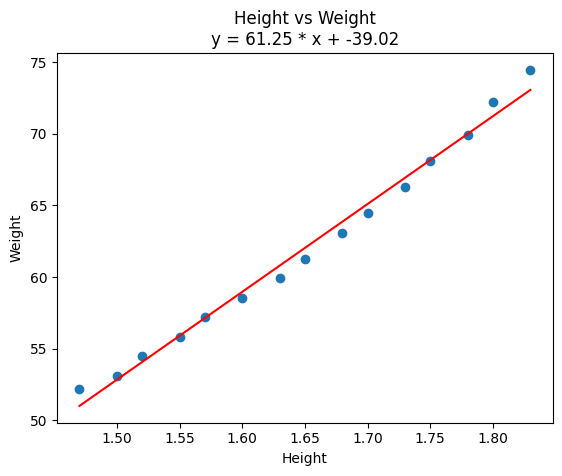

In [ ]:
plt.plot(x,th1*x+th0,'r-')
plt.title('Height vs Weight\ny = ' + str(round(th1,2)) + ' * x + ' + str(round(th0,2)))
plt.xlabel('Height')
plt.ylabel('Weight')
plt.scatter(x, y)

In [ ]:
ycalc= 61.24980824439948*x-39.024895914115824
sum_errores = np.sum((y-ycalc)**2)/len(x)
print(sum_errores)


0.49937667425215937


In [ ]:
print(x[0:3,])

0    1.47
1    1.50
2    1.52
Name: Height, dtype: float64


In [ ]:
unos = np.ones(len(x))
A = np.column_stack((x,unos))
print('Matriz A\n',A[0:3,])

Matriz A
 [[1.47 1.  ]
 [1.5  1.  ]
 [1.52 1.  ]]


In [ ]:
c = np.dot(np.linalg.inv(np.dot(A.T,A)),np.dot(A.T,y))
print('Vector  c \n',c)

Vector  c 
 [ 61.27218654 -39.06195592]


In [ ]:
c1 = c[0]
c2 = c[1]
y_calc = c1*x+c2
suma_errores = np.sum((y-y_calc)**2)
print(suma_errores)

7.490558403882581
